In [6]:
import matplotlib.pyplot as plt
import skimage
import numpy as np
from scipy.ndimage import gaussian_filter

from stitching import projective_equalization_parameter, projektive_equalization, calculate_weights, stitch, multi_band_blending

## Loading Images
And setting Variables

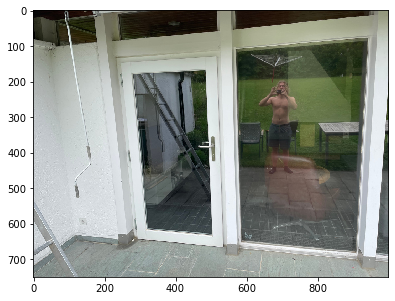

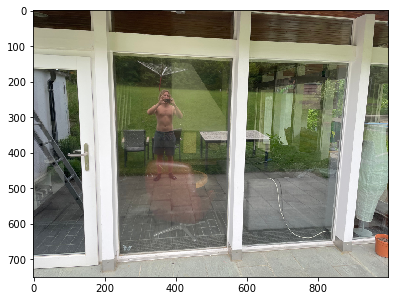

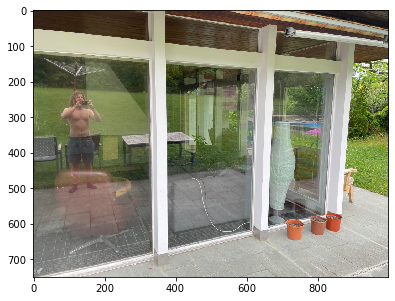

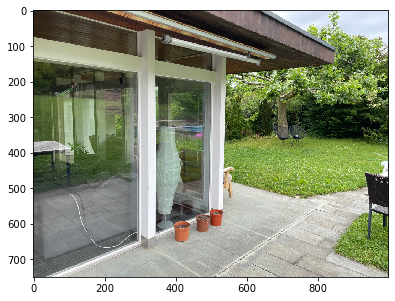

In [16]:
number_images = 4
images = [None] * number_images
picture_points = [None] * number_images
object_points = [None] * number_images

equalized_images = [None] * number_images
weights = [None] * number_images

images[0] = skimage.io.imread(fname="./IMG_1.JPG")
images[1] = skimage.io.imread(fname="./IMG_2.JPG")
images[2] = skimage.io.imread(fname="./IMG_3.JPG")
images[3] = skimage.io.imread(fname="./IMG_4.JPG")

shape = np.shape(images[0])
init_weights = calculate_weights(np.zeros(shape))

for image_nr in range(len(images)):
    fig = plt.figure(figsize=(14, 7))
    fig.add_subplot(1, 2, 1)
    plt.imshow(images[image_nr].astype(np.uint8))
plt.show()


## Passpoint Catalog
Picture and Objectpoints of all 4 Images

In [9]:
picture_points[0] = [[148, 247],[130, 516],[665, 534],[642, 294]]
object_points[0] = [[105, 5], [105, 100], [295, 100], [295, 5]]

picture_points[1] = [[114, 215],[133, 565],[674, 547],[708, 237]]
object_points[1] = [[100, 120], [100, 230], [295, 230], [295, 120]]

picture_points[2] = [[140, 373],[164, 635],[632, 619],[690, 379]]
object_points[2] = [[100, 240], [100, 350], [295, 350], [295, 240]]

picture_points[3] = [[182, 344],[206, 502],[569, 493],[633, 343]]
object_points[3] = [[100, 360], [100, 470], [295, 470], [295, 360]]

## Equalize Images and Weights (Entzerren)

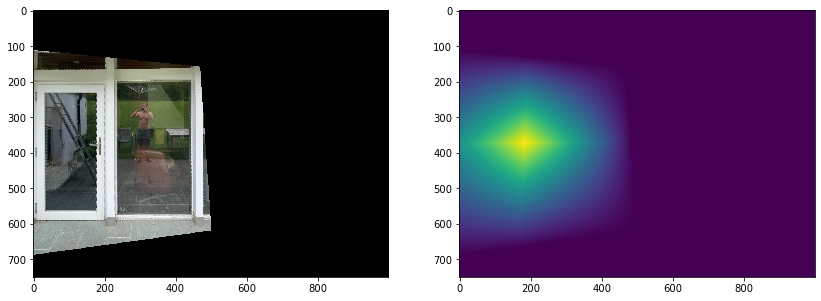

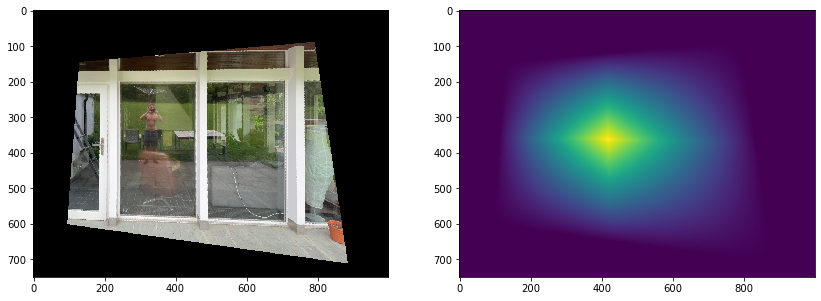

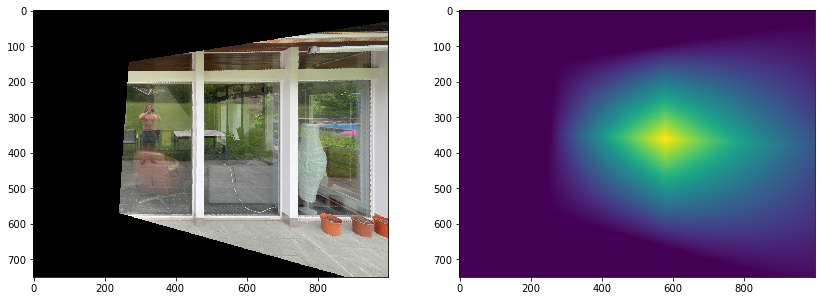

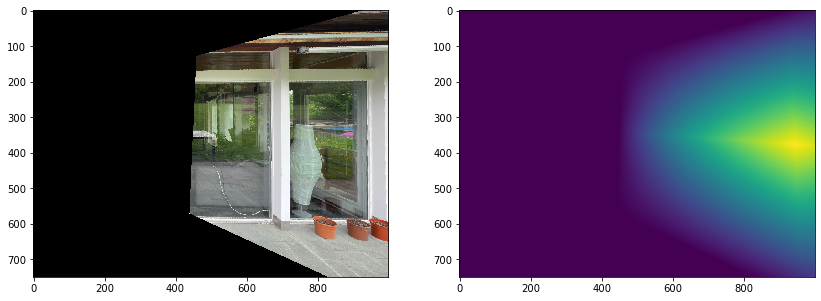

In [11]:
for image_nr in range(4):
        z=2
        object_points_scaled = np.array([[y*z, x*z] for y,x in object_points[image_nr]])

        a_vec = projective_equalization_parameter(object_points_scaled, picture_points[image_nr])
        equal_image = projektive_equalization(images[image_nr], a_vec)

        equal_weights = projektive_equalization(init_weights, a_vec)

        equalized_images[image_nr] = equal_image
        weights[image_nr] = np.squeeze(equal_weights[:,:,0]) 

for image_nr in range(len(images)):
    fig = plt.figure(figsize=(14, 7))
    fig.add_subplot(1, 2, 1)
    plt.imshow(equalized_images[image_nr].astype(np.uint8))

    fig.add_subplot(1, 2, 2)
    plt.imshow(weights[image_nr], interpolation='none')

plt.show()


## Image Stitching - Biggest Weight

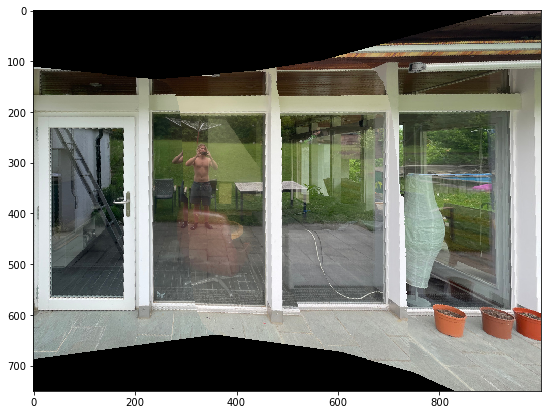

In [13]:
(stitched_image_1, stitched_weights_1) = stitch(equalized_images[0], equalized_images[1], weights[0], weights[1], 'weights')
(stitched_image_2, stitched_weights_2) = stitch(stitched_image_1, equalized_images[2], stitched_weights_1, weights[2], 'weights')
(stitched_image_3, stitched_weights_3) = stitch(stitched_image_2, equalized_images[3], stitched_weights_2, weights[3], 'weights')

fig = plt.figure(figsize=(14, 7))
plt.imshow(stitched_image_3.astype(np.uint8))


## Image Stitching - Weighted Sum

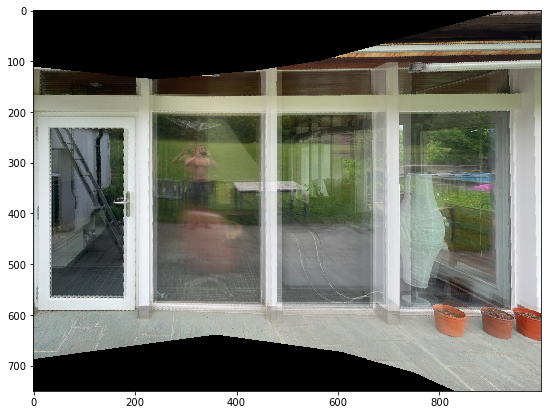

In [14]:
(stitched_image_sum_1, stitched_weights_sum_1) = stitch(equalized_images[0], equalized_images[1], weights[0], weights[1], 'sum')
(stitched_image_sum_2, stitched_weights_sum_2) = stitch(stitched_image_sum_1, equalized_images[2], stitched_weights_sum_1, weights[2], 'sum')
(stitched_image_sum_3, stitched_weights_sum_3) = stitch(stitched_image_sum_2, equalized_images[3], stitched_weights_sum_2, weights[3], 'sum')

fig = plt.figure(figsize=(14, 7))
plt.imshow(stitched_image_sum_3.astype(np.uint8))

## Image Stitching - Multi Band Blending
Frage:  - Kombinieren der Gewichte des HP und TP, Ergebnis Korrekt?

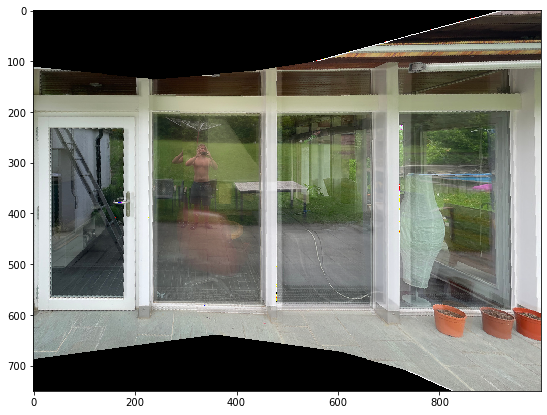

In [15]:

(mbb_image1, mbb_weights1) = multi_band_blending(equalized_images[0], weights[0], equalized_images[1], weights[1])
(mbb_image2, mbb_weights2) = multi_band_blending(mbb_image1, mbb_weights1, equalized_images[2], weights[2])
(mbb_image3, mbb_weights3) = multi_band_blending(mbb_image2, mbb_weights2, equalized_images[3], weights[3])

fig = plt.figure(figsize=(14, 7))
plt.imshow(mbb_image3.astype(np.uint8))
plt.show()